In [109]:
%matplotlib inline
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [5]:
data = pd.read_csv('E:/akmal/Resume analysis/Data/struc_discription.csv')
data['fresher'] = data['from'].apply(lambda x : 'fresher' if x == 0 else 'exp')
print('Total Job Discriptions = ',data.shape[0])
data['fresher'].value_counts()   

Total Job Discriptions =  114


fresher    68
exp        46
Name: fresher, dtype: int64

In [7]:
data.head(3)

,Unnamed: 0,description,clean_text,skill_set,joined_skills,from,to,fresher
0,0,Job Code: EHSJD201801\nEducation Qualification...,code ehsjd201801 education qualification b tec...,"['ajax', 'jsp', 'jsf', 'servlets', 'struts', '...",ajax jsp jsf servlets struts spring rest javas...,0.6,NaN,exp
1,1,Job SummaryLooking for developers to join our ...,looking developers join teamqualifications ski...,"['oop', 'android']",oop android,0.0,NaN,fresher
2,2,"Opening for Freshers / Experience for JAVA,TES...",opening freshers exp java testing aws devops n...,"['aws', 'jsp', 'jsf', 'servlets', 'struts', 's...",aws jsp jsf servlets struts spring soap html c...,0.0,7.0,fresher


In [90]:
def plot_10_most_common_words(count_data, count_vectorizer):
    #import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:45]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(10, 12/1.6180))
    plt.subplot(title='Count of words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    d = pd.DataFrame({'words':words,'counts':counts})
    d.set_index('words',inplace = True)
    return(d)

In [9]:
count_vector = CountVectorizer() 

In [10]:
skill_fres = data[data['fresher']=='fresher']['joined_skills']
skill_exp = data[data['fresher']=='exp']['joined_skills']
all_skills = data['joined_skills']
skill_fres.dropna(inplace = True)
skill_exp.dropna(inplace = True)
all_skills.dropna(inplace = True)

C:\Users\Akmal\Anaconda3\lib\site-packages\pandas\core\series.py:4787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [11]:
def graph_and_data(x):
    count_skill = count_vector.fit_transform(x)
    return(plot_10_most_common_words(count_skill,count_vector))

<h3>1) What are the important java skills that most of the companies espected as java devloper<\h3>

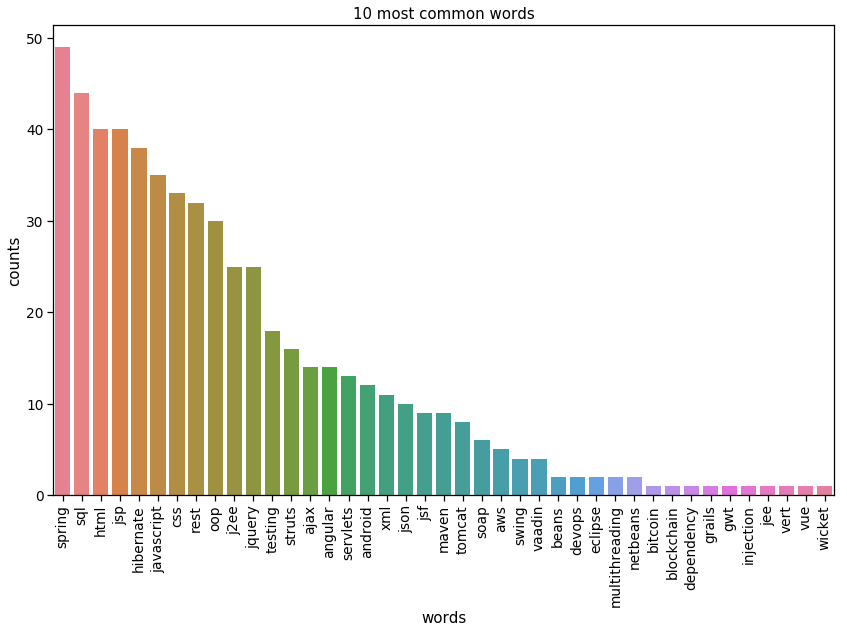

In [14]:
d_all = graph_and_data(all_skills)
d_all['percent'] = (d_all['counts']/sum(d_all['counts']))*100

<h3>All Fresher Skills <\h3>

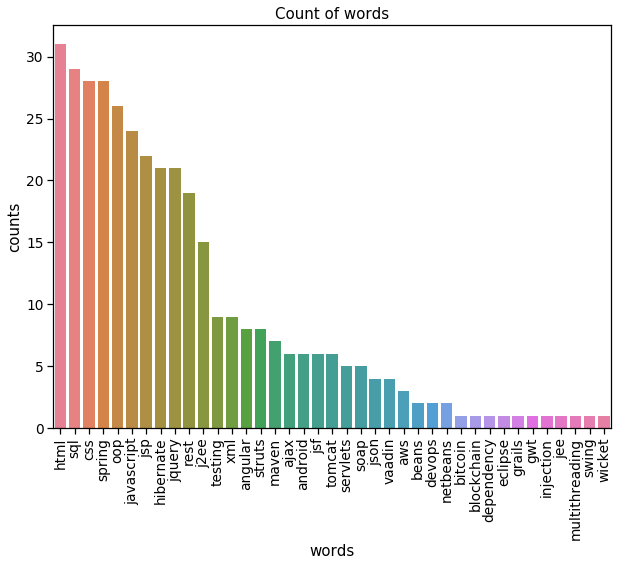

In [91]:
d_fresh = graph_and_data(skill_fres)
d_fresh['fresher'] = (d_fresh['counts']/sum(d_fresh['counts']))*100

<h3>All Experience Skills<\h3>

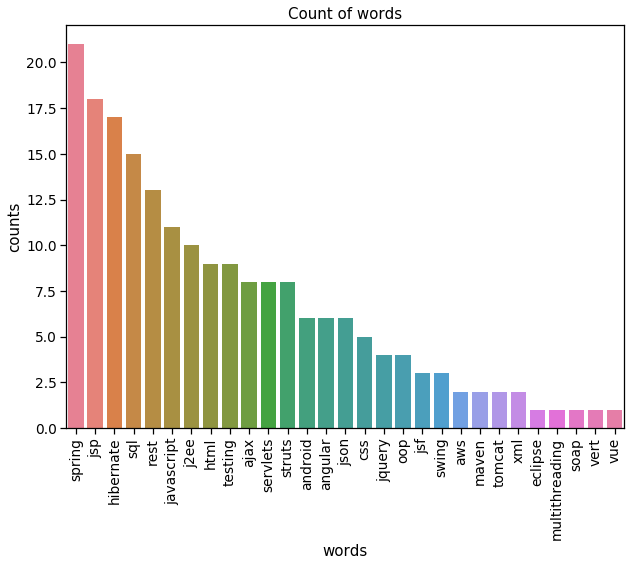

In [92]:
d_exp = graph_and_data(skill_exp)
d_exp['exp'] = (d_exp['counts']/sum(d_exp['counts']))*100

<h3>2) Is there a difference between fresher and expereince skills<\h3>

In [97]:
all_data = pd.concat([d_fresh, d_exp], axis=1, sort = False).reset_index()
all_data.drop('counts',axis = 1,inplace = True)
all_data.fillna(0,inplace = True)
all_data = pd.melt(all_data, id_vars="index", var_name = 'class', value_name="Percentage %")

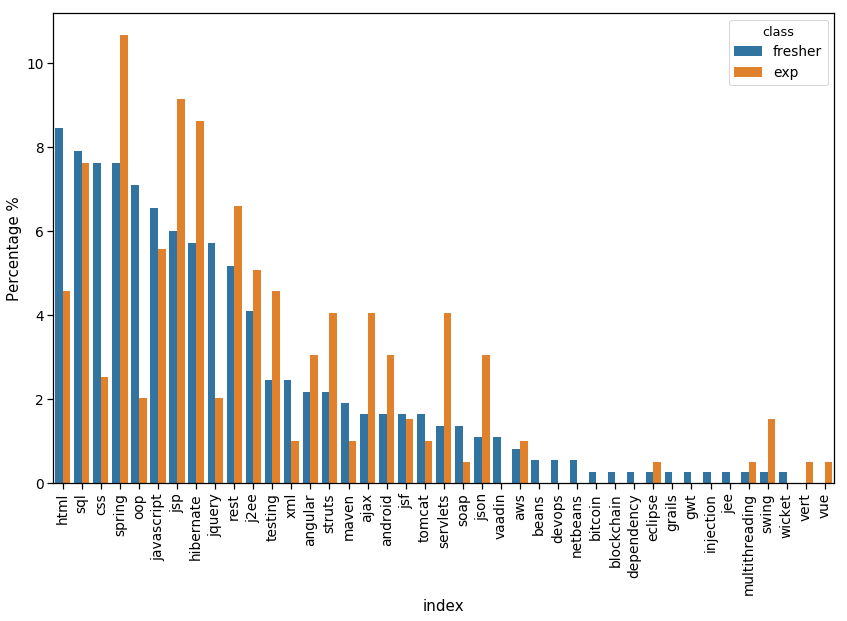

In [99]:
plt.figure(figsize=(14,14/1.6180))
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x="index", hue="class", y="Percentage %", data=all_data)
plt.xticks(rotation = 90)
plt.show()

<h3>From the above plot we find that there is pretty good variation in almost all skills for fresher and experienced candidate<\h3>

<h3>Lets see how much significant are this difference or are they likely to occur by 2 proportion test<\h3>

In [111]:
#dataset with counts
hypo_data = pd.concat([d_fresh, d_exp], axis=1, sort = False)
hypo_data.drop(['fresher','exp'],axis = 1,inplace = True)
hypo_data.fillna(0,inplace = True)

In [107]:
#function returns alpha values
def cal_alpha(x):
    a = hypo_data.loc[x,'counts'].values
    tot_count_fre = sum(hypo_data.iloc[:,0])
    tot_count_exp = sum(hypo_data.iloc[:,1])
    p1 = a[0]/tot_count_fre
    p2 = a[1]/tot_count_exp
    pc = (a[0]+a[1])/(tot_count_exp+tot_count_fre)
    sigma = np.sqrt(pc*(1-pc)/tot_count_exp + pc*(1-pc)/tot_count_fre)
    z = (p1-p2)/sigma
    return(1 - st.norm.cdf(z))

<h3> Lets set our α = 5%  <\h3>
<h4 style='color:yellow' >Ho :<\h4><h4 style='color:yello' >Proportion of fresher skills = Proportion of Experience skills<\h4>
<h4 style='color:yellow' >Ho :<\h4><h4 style='color:yello' >Proportion of fresher skills > Proportion of Experience skills<\h4>

In [114]:
#For example
alpha = cal_alpha('hibernate')
print(alpha)

0.9054374171668638


<h3>Lets do this for top 10 skills<\h3>

In [121]:
for x in hypo_data.index[:10]:
    alpha = cal_alpha(x)
    print(x,' =',alpha)

html  = 0.04357483040716981
sql  = 0.45166606609782467
css  = 0.00702392485011305
spring  = 0.8884236308469049
oop  = 0.005388821241490982
javascript  = 0.32688607806978665
jsp  = 0.9171376886126206
hibernate  = 0.9054374171668638
jquery  = 0.021139912174378828
rest  = 0.7567486914049015


<h3> From above analysis we found that skills HTML, CSS, OOP's, Jquery are improtant and should not be missed to mention on resume<\h3>